# Reprocess Building  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 2nd  2021
- creation update : April 2nd 2021
- version v0

# Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [36]:
from iminuit import Minuit
import iminuit

In [37]:
iminuit.__version__

'2.2.0'

In [38]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Function

In [39]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [40]:
filename_logbook='logbooks/auxtellogbook_2021_v1.2.csv'

In [41]:
df=pd.read_csv(filename_logbook)

In [42]:
pd.set_option('display.max_rows', None)

In [43]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,...,10.3,51.0,9.3,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,...,10.4,45.0,9.9,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,...,8.8,53.0,7.3,750.0,2700.0,NaN,NaN,,1.0,1.0
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,...,8.8,54.0,6.3,750.0,2700.0,NaN,NaN,,1.0,1.0
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,...,8.8,54.0,6.3,750.0,2700.0,NaN,NaN,,1.0,1.0
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,...,8.7,55.0,6.7,700.0,1700.0,NaN,NaN,,1.0,1.0


# Selection of input file

In [44]:
index_sel=15 # SELECTION

In [45]:
myhome=os.getenv("HOME")

In [46]:
dir_spectra=os.path.join(myhome,"DATA/AuxTelData2021/holo/FlipCleans")

In [47]:
filename_image=df["file"][index_sel]

In [48]:
file_target(filename_image)

['HD60753']

In [49]:
xpos=df["Obj-posXpix"][index_sel]
ypos=df["Obj-posYpix"][index_sel]

In [50]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs_reprocess/"
output_figures="figures_reprocess"
guess = [xpos,ypos]
disperser_label = df["disperser"][index_sel]
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [51]:
os.path.isdir(output_directory)

True

In [52]:
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)

In [53]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [54]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [55]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [56]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> parameter

2021-04-07 14:40:23  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits...
2021-04-07 14:40:23  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits...
2021-04-07 14:40:24  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-07 14:40:24  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-07 14:40:25  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-07 14:40:25  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-07 14:40:25  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/holo4_003
2021-04-07 14:40:25  Hologram   load_specs           INFO   
	Load disperser holo4_0

## Show relevant parameters

In [57]:
parameters.OBS_NAME

'AUXTEL'

In [58]:
parameters.DISPERSER_DIR

'/Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/'

In [59]:
parameters.DISTANCE2CCD

174.9980010986328

In [60]:
parameters.LAMBDA_MIN 

563

In [61]:
parameters.LAMBDA_MAX 

1095

In [62]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures_reprocess"

In [63]:
image.filter_label

'RG610'

In [64]:
image.header["FILTER"]

'RG610'

# Plot image and find the target position

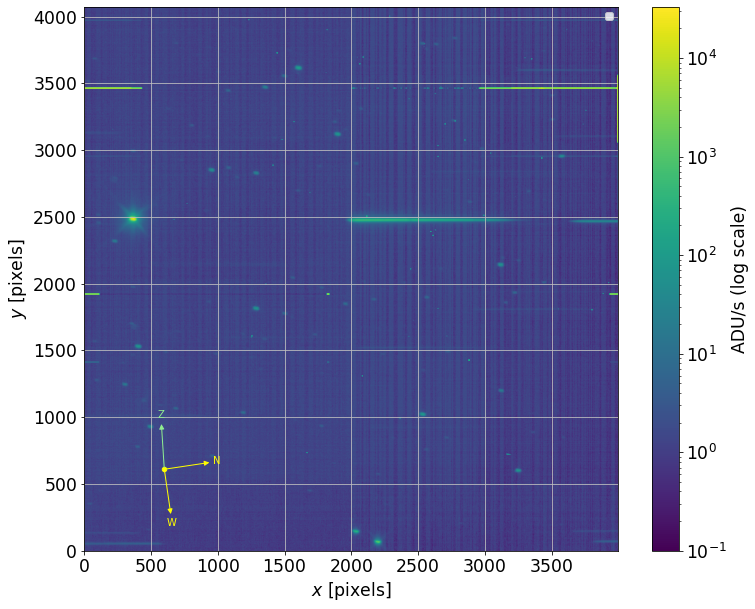

In [65]:
image.plot_image(figsize=(12, 10),scale="log")

# Find target

2021-04-07 14:40:34  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                 c0_1        
    ------------------ ------------------- ---------------------
    12.029296912208373 -0.0390064314288994 -0.015220698279886867
2021-04-07 14:40:34  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                 c0_1        
    ------------------ ------------------- ---------------------
    12.029296912208373 -0.0390064314288994 -0.015220698279886867
2021-04-07 14:40:35  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 6 iterations because the relative change of cost is below ftol=1.25e-05.
2021-04-07 14:40:35  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent t

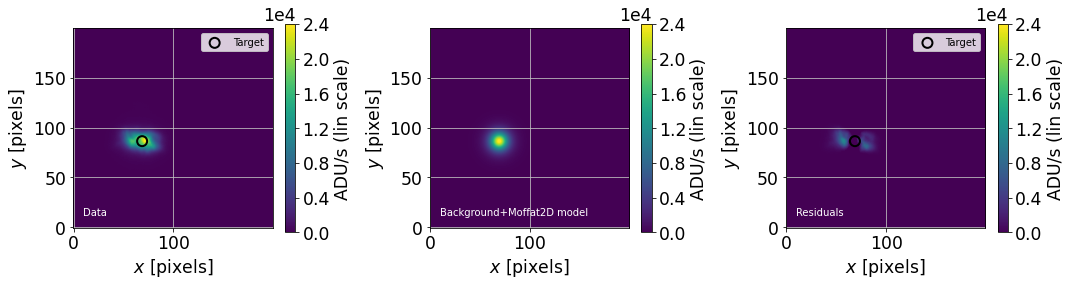

2021-04-07 14:40:35  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=5e-05.
2021-04-07 14:40:35  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=5e-05.


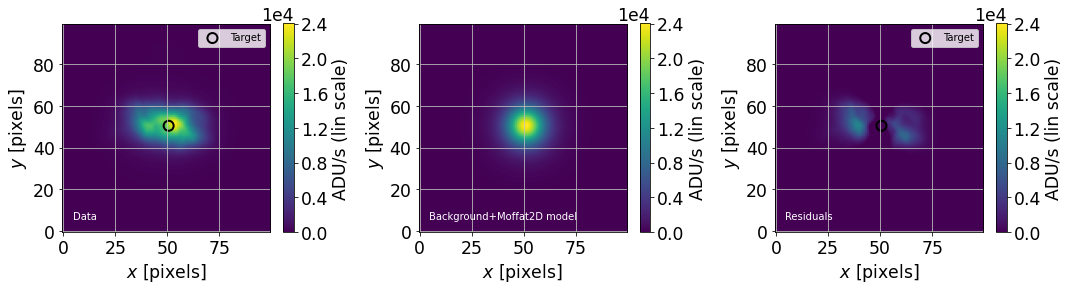

2021-04-07 14:40:36  Image      find_target          INFO   
	X,Y target position in pixels: 368.648,2486.446
2021-04-07 14:40:36  Image      find_target          INFO   
	X,Y target position in pixels: 368.648,2486.446


In [66]:
parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [67]:
print(x1,y1)

368.648225333456 2486.445640443571


# Go for spectrum reconstruction

2021-04-07 14:40:36  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-04-07 14:40:36  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> parameter

2021-04-07 14:40:36  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits...
2021-04-07 14:40:36  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits...
2021-04-07 14:40:37  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-07 14:40:37  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-07 14:40:37  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-07 14:40:37  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-07 14:40:37  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/holo4_003
2021-04-07 14:40:37  Hologram   load_specs           INFO   
	Load disperser holo4_0

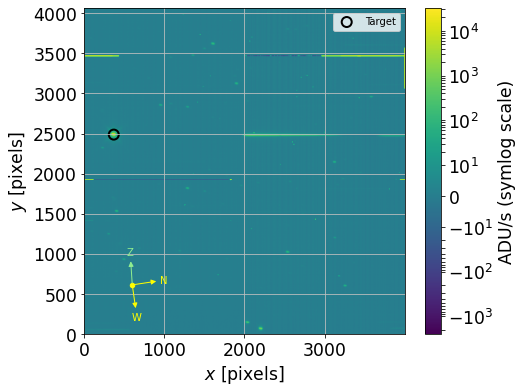

2021-04-07 14:40:45  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 368.64822533 2486.44564044]...
2021-04-07 14:40:45  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 368.64822533 2486.44564044]...
2021-04-07 14:40:45  spectractor.extractor.images find_target          INFO   
	No WCS /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD60753_2021-02-18_560_wcs/Cor_holo4_003_RG610_HD60753_2021-02-18_560.wcs available, use 2D fit to find target pixel position.
2021-04-07 14:40:45  spectractor.extractor.images find_target          INFO   
	No WCS /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD60753_2021-02-18_560_wcs/Cor_holo4_003_RG610_HD60753_2021-02-18_560.wcs available, use 2D fit to find target pixel position.
2021-04-07 14:40:46  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x',

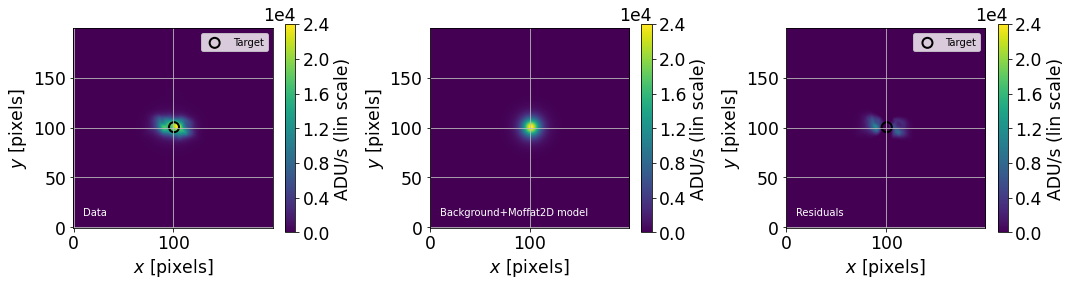

2021-04-07 14:40:46  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=5e-05.
2021-04-07 14:40:46  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=5e-05.


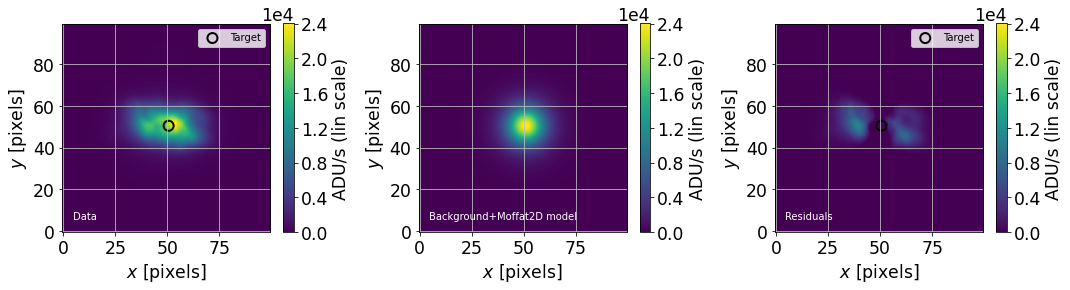

2021-04-07 14:40:47  Image      find_target          INFO   
	X,Y target position in pixels: 368.638,2486.446
2021-04-07 14:40:47  Image      find_target          INFO   
	X,Y target position in pixels: 368.638,2486.446


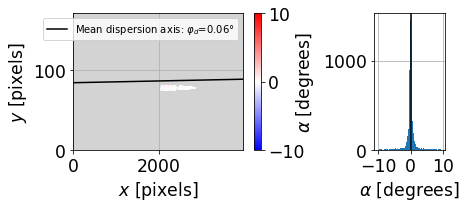

2021-04-07 14:40:48  Image      turn_image           INFO   
	Rotate the image with angle theta=0.06 degree
2021-04-07 14:40:48  Image      turn_image           INFO   
	Rotate the image with angle theta=0.06 degree
/Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


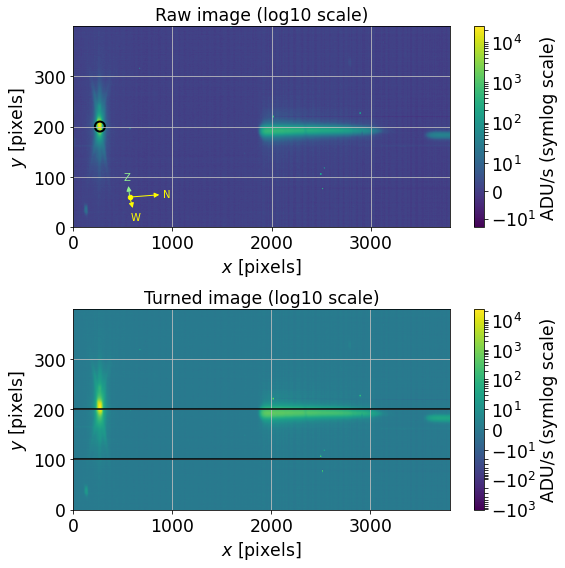

2021-04-07 14:40:59  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-07 14:40:59  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-07 14:40:59  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ----------------- -------------------- ------------------
    30.77447295719648 0.030006911414329308 0.0897540325323104
2021-04-07 14:40:59  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ----------------- -------------------- ------------------
    30.77447295719648 0.030006911414329308 0.0897540325323104
2021-04-07 14:40:59  spectract

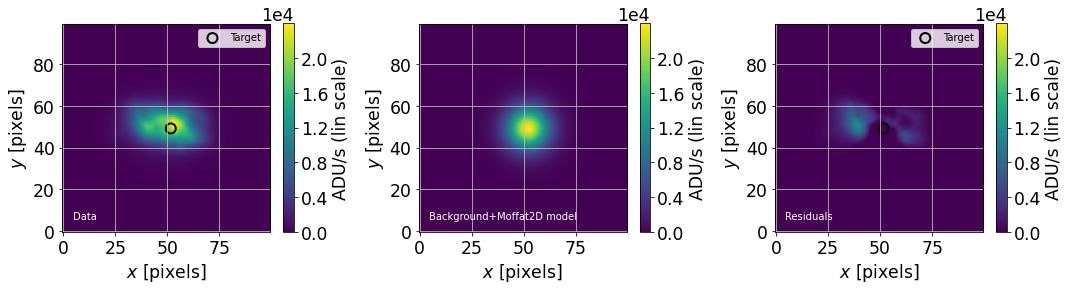

2021-04-07 14:41:00  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=0.0002.
2021-04-07 14:41:00  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=0.0002.


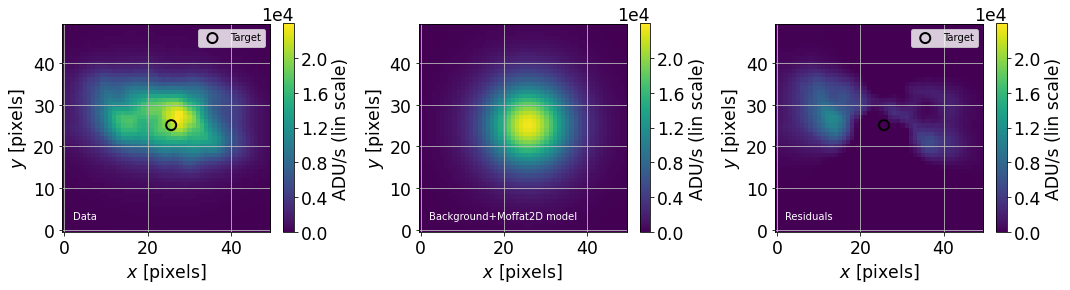

2021-04-07 14:41:01  Image      find_target          INFO   
	X,Y target position in pixels: 372.680,2489.122
2021-04-07 14:41:01  Image      find_target          INFO   
	X,Y target position in pixels: 372.680,2489.122
2021-04-07 14:41:01  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-07 14:41:01  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-07 14:41:01  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=565.0000000000005 and parameters.LAMBDA_MAX=1089.8000000001198.
2021-04-07 14:41:01  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=565.0000000000005 and parameters.LAMBDA_MAX=1089.8000000001198.
2021-04-07 14:41:01  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-04-07 14:41:01  spectractor.ext

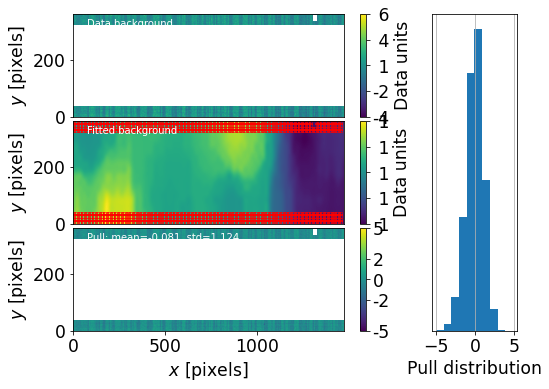

2021-04-07 14:41:03  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
2021-04-07 14:41:03  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
2021-04-07 14:41:11  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-11.891293176917248).
2021-04-07 14:41:11  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-11.891293176917248).
2021-04-07 14:41:11  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (180.0).
2021-04-07 14:41:11  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (180.0).
2021-04-07 14:41:11  spectractor.fit.fitter grad

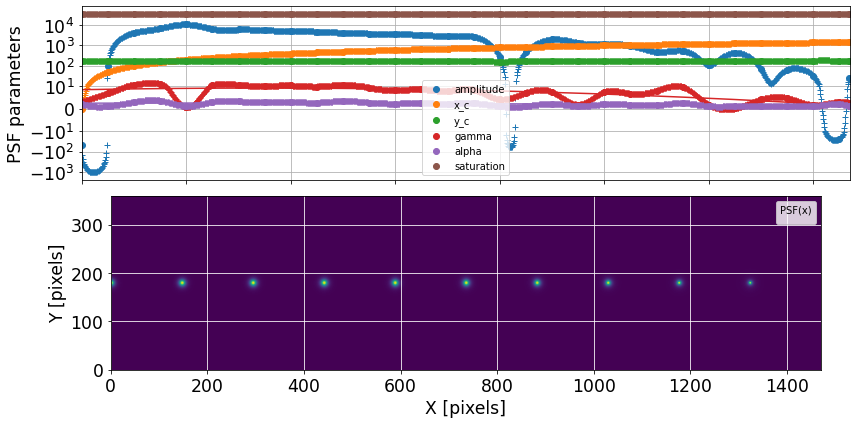

2021-04-07 14:41:15  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start ChromaticPSF polynomial fit with mode=1D and amplitude_priors_method=noprior...
2021-04-07 14:41:17  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.4679e+06 initial chisq_red=41.971
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [-0.92554862  2.09017517 -3.27915501  3.19484758 -2.15964918  2.16910363
  0.40649194 -0.68730042 -1.25270684]
	New parameters: [-9.90767079  0.01480576 -0.14901153  8.88893891 -7.17097595 -4.15901657
  2.18454581 -2.10771821 -2.6283101 ]
	Final cost=3.9288e+05 final chisq_red=6.6816 computed in 1.17s
2021-04-07 14:41:17  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.4679e+06 initial chisq_red=41.971
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [-0.92554862  2.09017517 -3.27915501  3.19484758 -2.15964918  2.16910363
  0.40649194 -0.68730042 -1.25270684]
	N

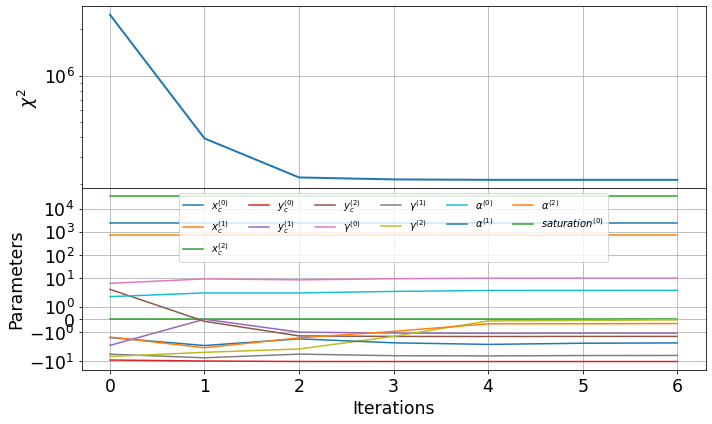

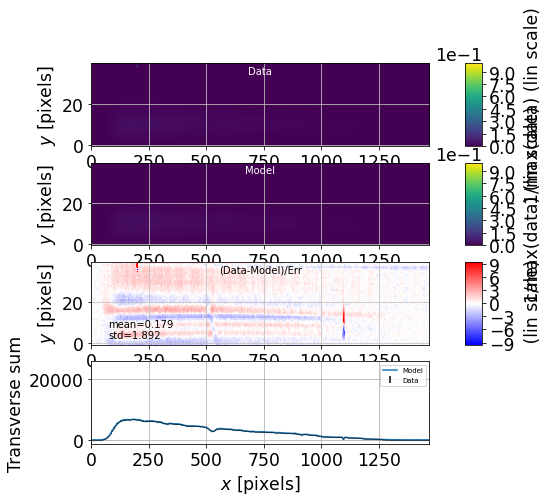

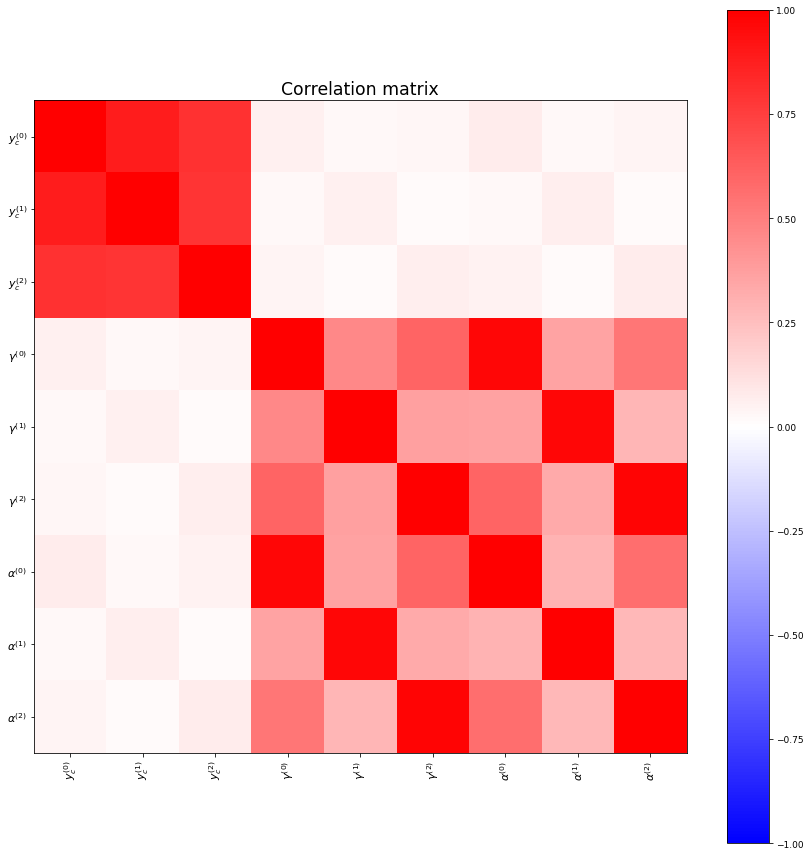

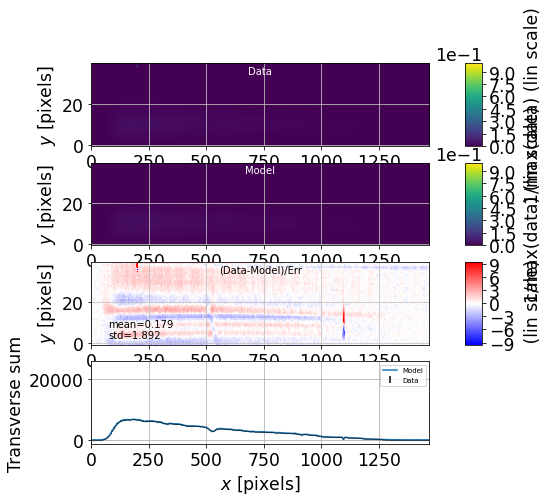

2021-04-07 14:41:29  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude       x_c   ...          Dy         Dy_disp_axis
------------------- ------ ... ------------------- ------------
 -9.904073874201623    0.0 ... -10.700237340790636          0.0
-6.0818834069538505    1.0 ... -10.696278963236892          0.0
 -7.834024262925806    2.0 ... -10.692327974094667          0.0
 15.125905882072768    3.0 ...  -10.68838437336396          0.0
 -5.522262846959057    4.0 ... -10.684448161044742          0.0
  8.414593177361638    5.0 ... -10.680519337137042          0.0
  2.176033046789488    6.0 ... -10.676597901640832          0.0
  6.041334137062571    7.0 ...  -10.67268385455614          0.0
-0.6988336191298887    8.0 ... -10.668777195882967          0.0
  7.244493591981554    9.0 ... -10.664877925621312          0.0
                ...    ... ...                 ...          ...
 10.067228495791147 1459.0 ...   -12.7

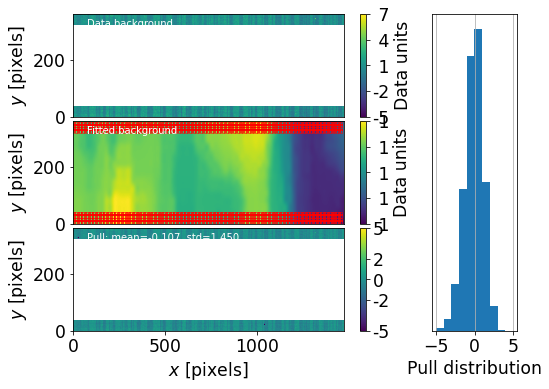

2021-04-07 14:41:31  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=1.068 ADU/s, RMS=1.815 ADU/s.
2021-04-07 14:41:31  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=1.068 ADU/s, RMS=1.815 ADU/s.
2021-04-07 14:41:31  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1916:3386,2307:2670] (size (1470, 363))
	New target position in spectrogram frame: [-1547.361701406905, 179.44635763667793]
2021-04-07 14:41:31  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1916:3386,2307:2670] (size (1470, 363))
	New target position in spectrogram frame: [-1547.361701406905, 179.44635763667793]


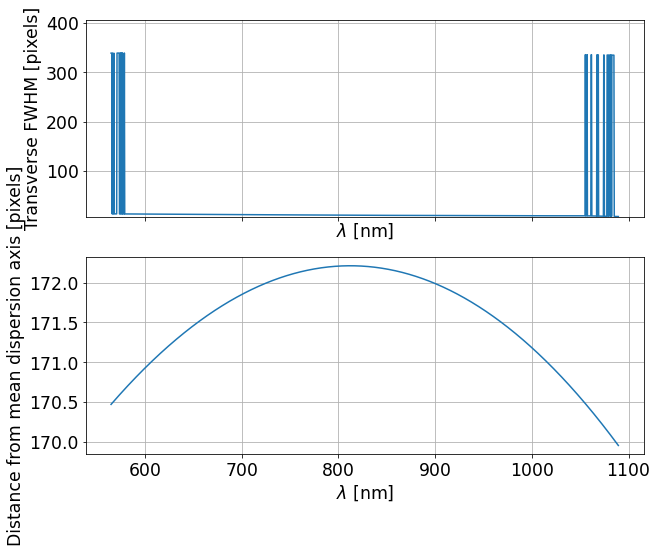

/Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


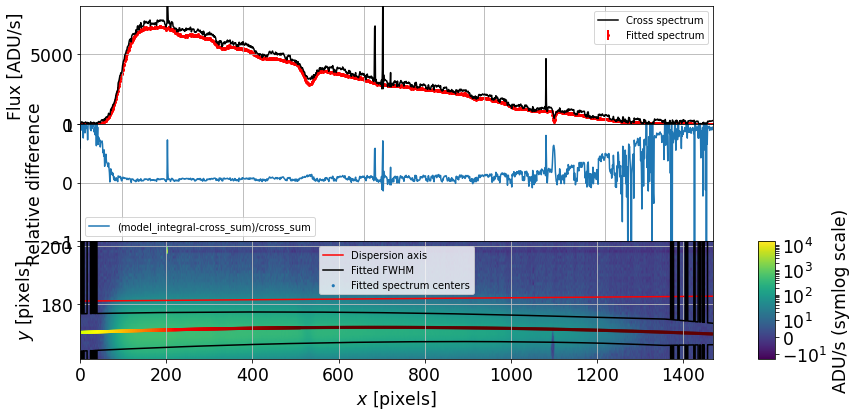

2021-04-07 14:41:34  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...
2021-04-07 14:41:34  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


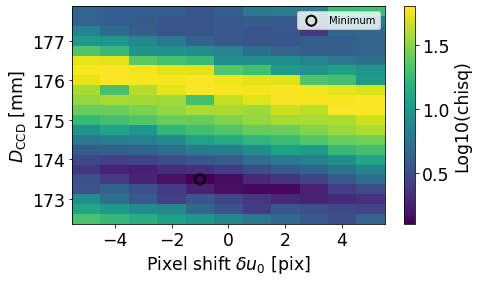

2021-04-07 14:41:48  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: -1.000pix
	D = 173.506 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -3.0 sigma shift)
2021-04-07 14:41:48  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: -1.000pix
	D = 173.506 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -3.0 sigma shift)
2021-04-07 14:41:48  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-07 14:41:48  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-07 14:41:49  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_reprocess/Cor_holo4_003_RG610_HD60753_2021-02-18_560_spectrum.fits
2021-04-07 14:41:49  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_reprocess/Cor_holo4_003_RG610_HD60753_2021-02-18_560_spectrum.fits
2021-04-07 14:41:49  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs_reprocess

   Line   Tabulated  Detected   Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
              nm        nm        nm     ...  reduced       nm          nm     
--------- --------- --------- ---------- ... --------- ----------- ------------
$H\alpha$ 656.34265   655.513   -0.82967 ... 1.1962382  0.28269035    0.5825423
 $O_2(B)$   687.472  687.9184  0.4463905 ...  1.197796  0.65219355    1.1991271
              760.3 759.62274 -0.6772288 ... 0.7445881   1.9288197    3.1015937
    $O_2$     763.1  763.6188  0.5187601 ... 0.7445881   1.3765513    2.8824127
 $O_2(Y)$   898.765 900.62524  1.8602419 ... 0.9226877   0.7468484    1.0922275


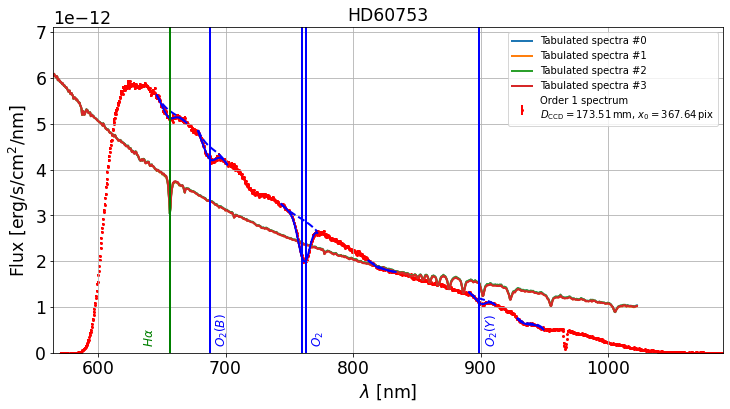

In [68]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)